# Read in train File, and initial data analysis


In [1]:
#First, import all necessary libraries for data cleaning
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

color = sns.color_palette()
%matplotlib inline

In [2]:
#second, load in training data first
train_df = pd.read_csv('merged_df_2016.csv',header=0,parse_dates = ['transactiondate','transaction_month','yearbuilt','assessmentyear'])
train_df.drop(['Unnamed: 0'],axis=1,inplace = True)
train_df.info()
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 41 columns):
parcelid                             90275 non-null int64
logerror                             90275 non-null float64
transactiondate                      90275 non-null datetime64[ns]
transaction_month                    90275 non-null object
basementsqft                         90275 non-null float64
bathroomcnt                          90275 non-null float64
bedroomcnt                           90275 non-null float64
buildingqualitytypeid                90275 non-null float64
calculatedfinishedsquarefeet         89614 non-null float64
fips                                 90275 non-null float64
fireplacecnt                         90275 non-null float64
fullbathcnt                          90275 non-null float64
garagetotalsqft                      29937 non-null float64
hashottuborspa                       90275 non-null bool
heatingorsystemtypeid                90275 non-nul

,parcelid,logerror,transactiondate,transaction_month,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,taxdelinquencyflag,censustractandblock,garagetotalsqft_median,unitcnt_median,calculatedfinishedsquarefeet_mean,numberofstories_median,calculatedfinishedsquarefeet_reg
0,11016594,0.0276,2016-01-01,1,0.0,2.0,3.0,4.0,1684.0,6037.0,...,122754.0,360170.0,2015.0,N,6.037107e+13,433.0,1.0,1684.0,1.440739,1684.0
1,14366692,-0.1684,2016-01-01,1,0.0,3.5,4.0,4.0,2263.0,6059.0,...,346458.0,585529.0,2015.0,N,NaN,468.0,1.0,2263.0,1.440739,2263.0
2,12098116,-0.0040,2016-01-01,1,0.0,3.0,2.0,4.0,2217.0,6037.0,...,61994.0,119906.0,2015.0,N,6.037464e+13,433.0,1.0,2217.0,1.440739,2217.0
3,12643413,0.0218,2016-01-02,1,0.0,2.0,2.0,4.0,839.0,6037.0,...,171518.0,244880.0,2015.0,N,6.037296e+13,433.0,1.0,839.0,1.440739,839.0
4,14432541,-0.0050,2016-01-02,1,0.0,2.5,4.0,4.0,2283.0,6059.0,...,169574.0,434551.0,2015.0,N,6.059042e+13,598.0,1.0,2283.0,2.000000,2283.0


### First, investigate linear relationship between different features and target(logerrors).

Features will be investigated are:
1. calculatedfinishedsquarefeet
2. lotsizesquarefeet
3. structuretaxvalue
4. taxvaluedollarcnt

In [3]:
def pearson_r(x, y):  
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

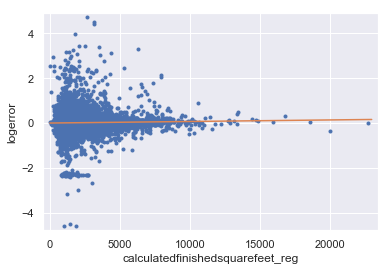

0.03976444799153501
slope = 6.898634941442864e-06 calculatedfinishedsquarefeet_reg / perlogerror
intercept = -0.0007706146554921285 logerror


In [4]:
sns.set()
# Plot the basementsqft Vs logerror
_ = plt.plot(train_df.calculatedfinishedsquarefeet_reg, train_df.logerror, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('calculatedfinishedsquarefeet_reg')
_ = plt.ylabel('logerror')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train_df.calculatedfinishedsquarefeet_reg, train_df.logerror,1)

# Make theoretical line to plot
x = np.linspace(0,23000,100)
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(train_df.calculatedfinishedsquarefeet_reg, train_df.logerror))

# Print the results to the screen
print('slope =', a, 'calculatedfinishedsquarefeet_reg / perlogerror')
print('intercept =', b, 'logerror')

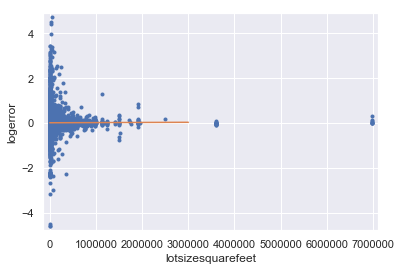

0.0050293770789607
slope = 7.0130924504051905e-09 lotsizesquarefeet / perlogerror
intercept = 0.01127307033165564 logerror


In [5]:
sns.set()
# Plot the basementsqft Vs logerror
_ = plt.plot(train_df.lotsizesquarefeet, train_df.logerror, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('lotsizesquarefeet')
_ = plt.ylabel('logerror')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train_df.lotsizesquarefeet, train_df.logerror,1)

# Make theoretical line to plot
x = np.linspace(0,3000000,100)
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(train_df.lotsizesquarefeet, train_df.logerror))

# Print the results to the screen
print('slope =', a, 'lotsizesquarefeet / perlogerror')
print('intercept =', b, 'logerror')

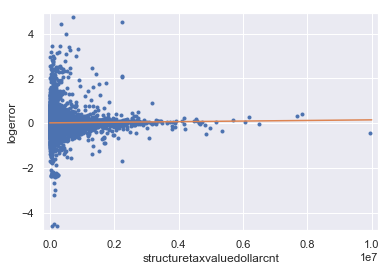

0.017622379384669797
slope = 1.342705854652771e-08 structuretaxvaluedollarcnt / perlogerror
intercept = 0.009032729887691115 logerror


In [6]:

sns.set()
# Plot the basementsqft Vs logerror
_ = plt.plot(train_df.structuretaxvaluedollarcnt, train_df.logerror, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('structuretaxvaluedollarcnt')
_ = plt.ylabel('logerror')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train_df.structuretaxvaluedollarcnt, train_df.logerror,1)

# Make theoretical line to plot
x = np.linspace(0,10000000,100)
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(train_df.structuretaxvaluedollarcnt, train_df.logerror))

# Print the results to the screen
print('slope =', a, 'structuretaxvaluedollarcnt / perlogerror')
print('intercept =', b, 'logerror')

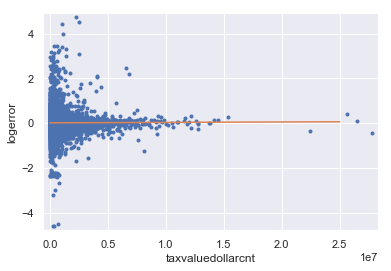

0.006512308539525515
slope = 1.8904850064504556e-09 taxvaluedollarcnt / perlogerror
intercept = 0.010591998770962485 logerror


In [7]:

sns.set()
# Plot the basementsqft Vs logerror
_ = plt.plot(train_df.taxvaluedollarcnt, train_df.logerror, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('taxvaluedollarcnt')
_ = plt.ylabel('logerror')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train_df.taxvaluedollarcnt, train_df.logerror,1)

# Make theoretical line to plot
x = np.linspace(0,25000000,100)
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(train_df.taxvaluedollarcnt, train_df.logerror))

# Print the results to the screen
print('slope =', a, 'taxvaluedollarcnt / perlogerror')
print('intercept =', b, 'logerror')

### Initial plot of these four parameters show that the slopes are extremely small, so there is no clear linear relationship bewteen these four parameters with logerror. So we can apply hypothesis test on this Null assumption:

The Null hypothesis: the slope between parameter and logerror is zero. Then paired bootstrap technique will be applied to test this hypothesis.

In [8]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

[5.41183796e-06 8.24234337e-06]


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


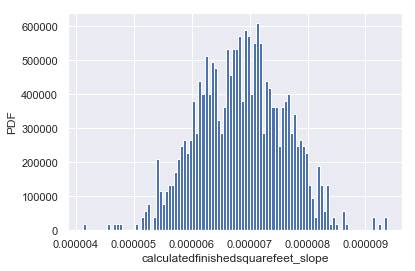

In [9]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(train_df.calculatedfinishedsquarefeet_reg, train_df.logerror,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=100, normed=True)
_ = plt.xlabel('calculatedfinishedsquarefeet_slope')
_ = plt.ylabel('PDF')
plt.show()

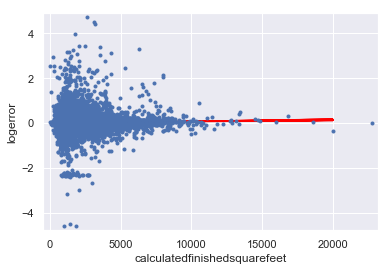

In [10]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,20000])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, color='red')

# Plot the data
_ = plt.plot(train_df.calculatedfinishedsquarefeet_reg, train_df.logerror,marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('calculatedfinishedsquarefeet')
_ = plt.ylabel('logerror')
plt.margins(0.02)
plt.show()

[-1.50878916e-09  1.47564986e-08]


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


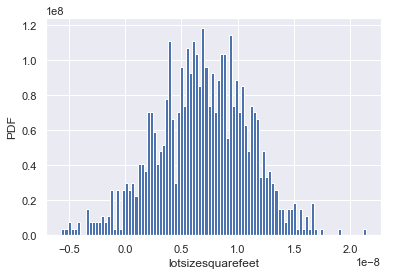

In [11]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(train_df.lotsizesquarefeet, train_df.logerror,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=100,normed=True)
_ = plt.xlabel('lotsizesquarefeet')
_ = plt.ylabel('PDF')
plt.show()

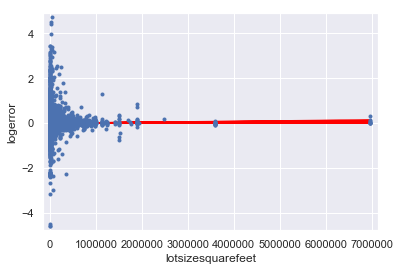

In [12]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,7000000])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, color='red')

# Plot the data
_ = plt.plot(train_df.lotsizesquarefeet, train_df.logerror,marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('lotsizesquarefeet')
_ = plt.ylabel('logerror')
plt.margins(0.02)
plt.show()

[4.49587192e-09 2.33500637e-08]


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


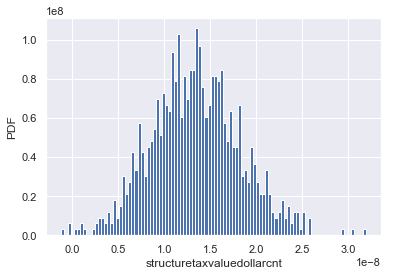

In [13]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(train_df.structuretaxvaluedollarcnt, train_df.logerror,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=100,normed=True)
_ = plt.xlabel('structuretaxvaluedollarcnt')
_ = plt.ylabel('PDF')
plt.show()

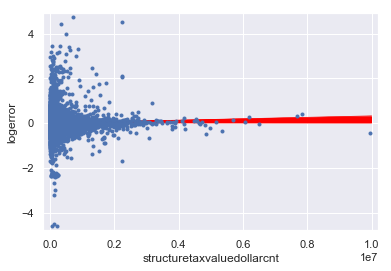

In [14]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,10000000])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, color='red')

# Plot the data
_ = plt.plot(train_df.structuretaxvaluedollarcnt, train_df.logerror, marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('structuretaxvaluedollarcnt')
_ = plt.ylabel('logerror')
plt.margins(0.02)
plt.show()

[-1.0010148e-09  5.4755012e-09]


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


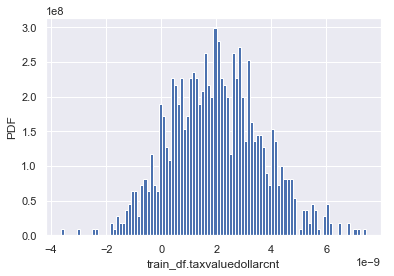

In [15]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(train_df.taxvaluedollarcnt, train_df.logerror,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=100,normed=True)
_ = plt.xlabel('train_df.taxvaluedollarcnt')
_ = plt.ylabel('PDF')
plt.show()    

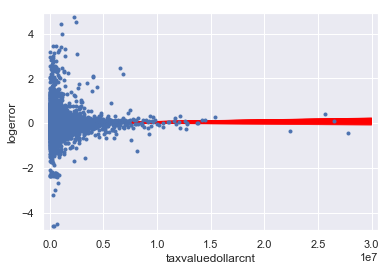

In [16]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,30000000])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, color='red')

# Plot the data
_ = plt.plot(train_df.taxvaluedollarcnt, train_df.logerror, marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('taxvaluedollarcnt')
_ = plt.ylabel('logerror')
plt.margins(0.02)
plt.show()

All four parameters, 1.calculatedfinishedsquarefeet, 2.lotsizesquarefeet, 3.structuretaxvalue, 4.taxvaluedollarcnt are have zero slopes against logerror. The 95% confidence intervals validate this conclusion.

# Multicolinearity analysis

### Second, check several multicolinearity for several similar features, e.g. roomcnt, bedroomcnt, bathroomcnt. If there are multicolinearity, PCA is needed.

1. several cnt related parameters:bathroomcnt,bedroomcnt,unitcnt, garagecnt, roomcnt
2. several sqft related parameters:lotsizesqft,calcuatedsqft, garagesizesqft
3. tax related info: structure taxvalue

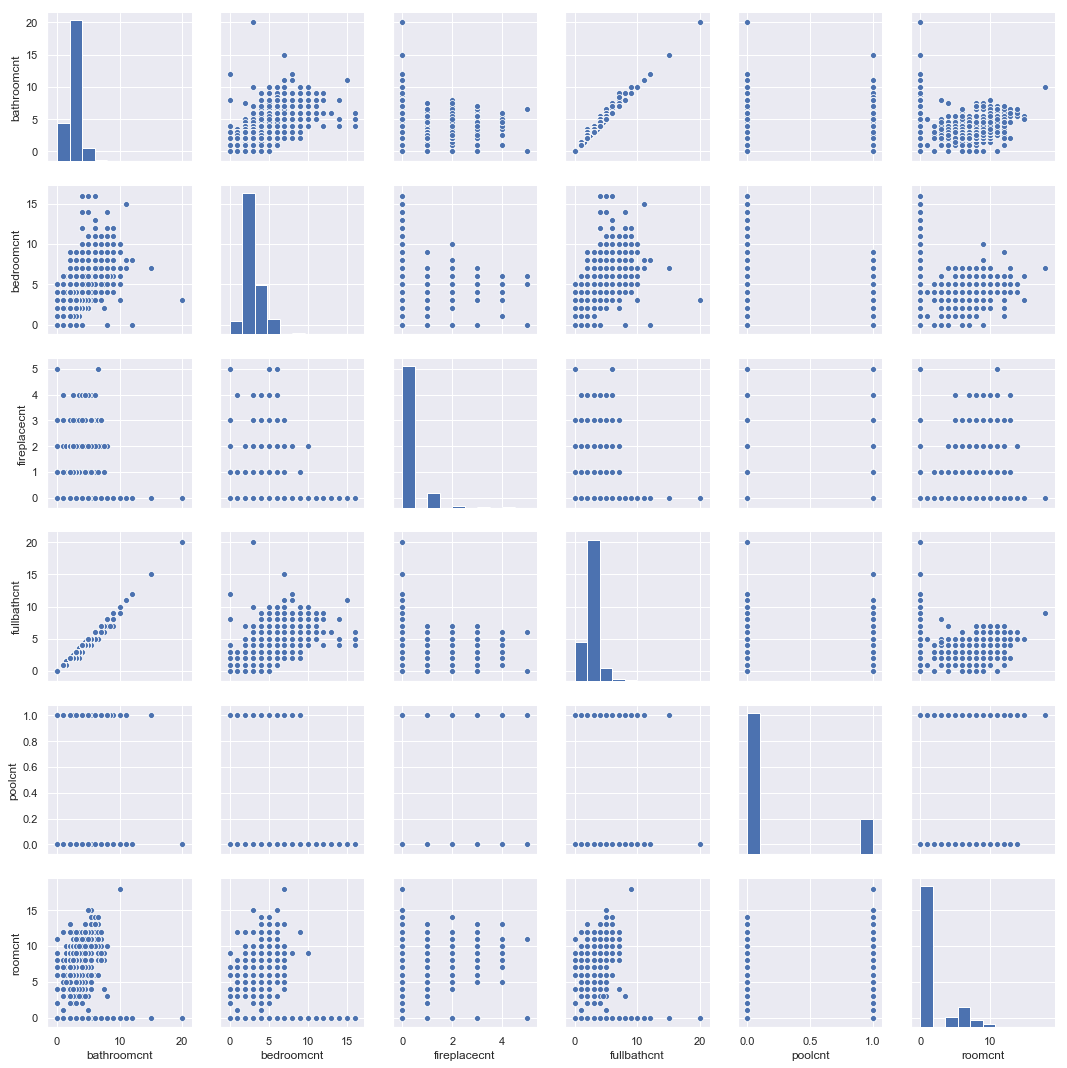

In [17]:
#first test bathroomcnt, bedroomcnt, fireplacecnt, fullbathcnt, poolcnt, roomcnt, unitcnt
#pair plot cnt-related features
cnt_col = ['bathroomcnt', 'bedroomcnt','fireplacecnt', 'fullbathcnt', 'poolcnt','roomcnt']    
sns.pairplot(train_df[cnt_col])
plt.show()

From the pairplot, bathroomcnt and fullbathcnt are strongly correlated, bedroomcnt, bathroomcnt and roomcnt are correlated. Aagin Paired Bootstrap is applied to test this.

[0.96973063 0.97231221]


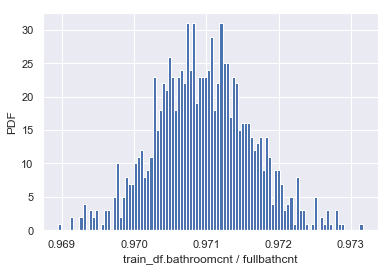

In [18]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(train_df.bathroomcnt, train_df.fullbathcnt,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=100)
_ = plt.xlabel('train_df.bathroomcnt / fullbathcnt')
_ = plt.ylabel('PDF')
plt.show()    

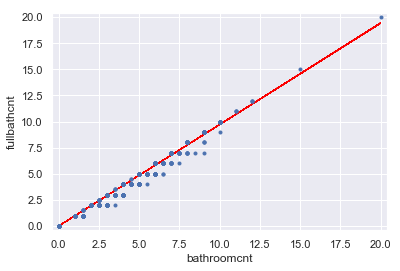

In [19]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,20])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, color='red')

# Plot the data
_ = plt.plot(train_df.bathroomcnt, train_df.fullbathcnt, marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('bathroomcnt')
_ = plt.ylabel('fullbathcnt')
plt.margins(0.02)
plt.show()

In [20]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train_df.bathroomcnt, train_df.fullbathcnt, 1)

# Print the results to the screen
print('slope =', a, 'bathroomcnt / fullbathcnt')
print('intercept =', b)

slope = 0.9709739603410984 bathroomcnt / fullbathcnt
intercept = -0.0009308897480534026


The confidence interval and pair bootstrap show that bathroomcnt and fullbathcnt has strong linearity relationship between each other.

[0.73367386 0.75333246]


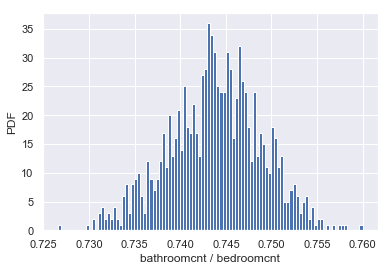

In [21]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(train_df.bathroomcnt, train_df.bedroomcnt,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=100)
_ = plt.xlabel('bathroomcnt / bedroomcnt')
_ = plt.ylabel('PDF')
plt.show()    

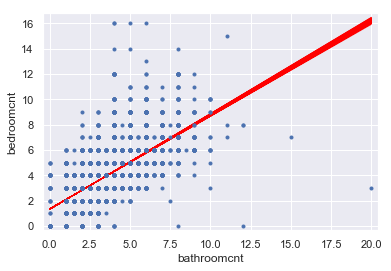

In [22]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,20])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, color='red')

# Plot the data
_ = plt.plot(train_df.bathroomcnt, train_df.bedroomcnt, marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('bathroomcnt')
_ = plt.ylabel('bedroomcnt')
plt.margins(0.02)
plt.show()

In [23]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train_df.bathroomcnt, train_df.bedroomcnt, 1)

# Print the results to the screen
print('slope =', a, 'bathroomcnt / bedroomcnt')
print('intercept =', b)

slope = 0.7440182392646051 bathroomcnt / bedroomcnt
intercept = 1.3358991828661455


The confidence interval and pair bootstrap show that bathroomcnt and bedroomcnt has some linearity relationship between each other, but not as strong as the bathroom, fullbath parameters.

[0.10761521 0.14218645]


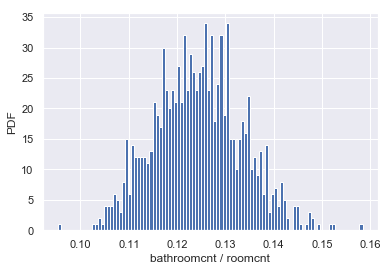

In [24]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(train_df.bathroomcnt, train_df.roomcnt,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=100)
_ = plt.xlabel('bathroomcnt / roomcnt')
_ = plt.ylabel('PDF')
plt.show()    

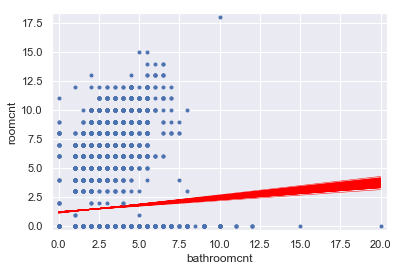

In [25]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,20])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, color='red')

# Plot the data
_ = plt.plot(train_df.bathroomcnt, train_df.roomcnt, marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('bathroomcnt')
_ = plt.ylabel('roomcnt')
plt.margins(0.02)
plt.show()

In [26]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train_df.bathroomcnt, train_df.roomcnt, 1)

# Print the results to the screen
print('slope =', a, 'bathroomcnt / roomcnt')
print('intercept =', b)

slope = 0.12482914129184605 bathroomcnt / roomcnt
intercept = 1.1939708858436031


The confidence interval and pair bootstrap show that bathroomcnt and roomcnt has some linearity relationship between each other, but not as strong as the bathroom, fullbath parameters.

[0.3836731  0.41723856]


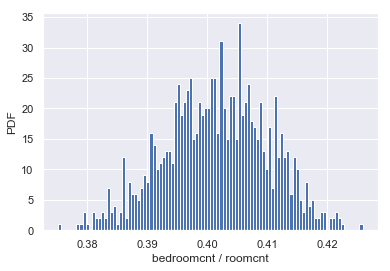

In [27]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(train_df.bedroomcnt, train_df.roomcnt,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=100)
_ = plt.xlabel('bedroomcnt / roomcnt')
_ = plt.ylabel('PDF')
plt.show()    

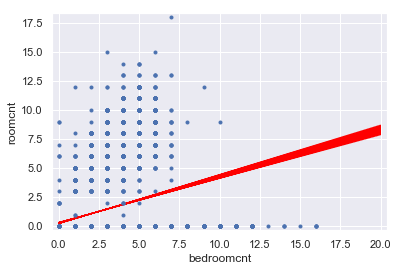

In [28]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,20])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, color='red')

# Plot the data
_ = plt.plot(train_df.bedroomcnt, train_df.roomcnt, marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('bedroomcnt')
_ = plt.ylabel('roomcnt')
plt.margins(0.02)
plt.show()

In [29]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train_df.bedroomcnt, train_df.roomcnt, 1)

# Print the results to the screen
print('slope =', a, 'bedroomcnt / roomcnt')
print('intercept =', b)

slope = 0.4010468688438089 bedroomcnt / roomcnt
intercept = 0.26259396182456424


The confidence interval and pair bootstrap show that bedroomcnt and roomcnt has some linearity relationship between each other, but not as strong as the bathroom, fullbath parameters.

### Third, check if two different fillna methods, KNN modeling and Median value methods. Does it change the mean value distribution with different methods or not. 

1. calculatedfinishedsqft_reg and calculatedfinishedsqft_median
2. garagetotalsqft filled with 0 and median value

(0, 4000)

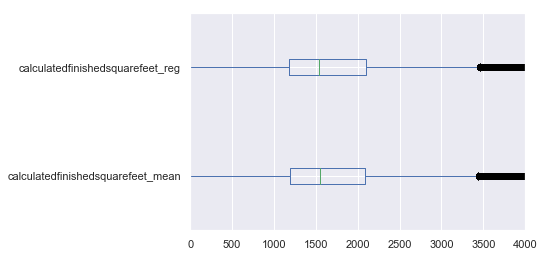

In [17]:
train_df.boxplot(column=['calculatedfinishedsquarefeet_mean', 'calculatedfinishedsquarefeet_reg'], vert=False)
plt.xlim(0,4000)

In [ ]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    
    return perm_sample_1, perm_sample_2

In [ ]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates  

In [21]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean logerror from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(train_df['calculatedfinishedsquarefeet_mean'],train_df['calculatedfinishedsquarefeet_reg'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(train_df['calculatedfinishedsquarefeet_mean'],train_df['calculatedfinishedsquarefeet_reg'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)   
print(empirical_diff_means)

p-value = 0.4379
0.6854315936800504


### This large p values mean that there is a high possibility that calculatedfinishedsquarefeet filled by knn and median values have the same mean value. There is no big difference in these two filling methods for calculatedfinishedsquarefeet variable.

Possible explanation for this is because there are very few missing values for calculatedfinishedsquarefeet. 
This statement will be further examined during the algorithm building part.

In [ ]:
train_df['garagetotalsqft_0'] = train_df['garagetotalsqft'].fillna(0)

(0, 300)

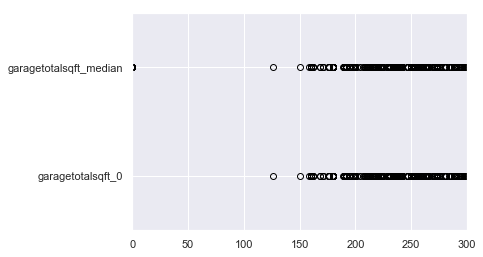

In [25]:
train_df.boxplot(column=['garagetotalsqft_0', 'garagetotalsqft_median'], vert=False)
plt.xlim(0,300)

In [26]:
# Compute difference of mean logerror from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(train_df['garagetotalsqft_median'],train_df['garagetotalsqft_0'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(train_df['garagetotalsqft_median'],train_df['garagetotalsqft_0'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)   
print(empirical_diff_means)

p-value = 0.0
289.4085184159512


#### There is a extremely low probablity that these two fill methods will have same mean values. Again these two fill methods will be tested in the algorithm testing stage.

### Fourth, check if there is a genuine fip difference in logerror by checking mean value differences with two sample hypothesis and pemutation method.

From previous EDA analysis, fips 6111 has fewest training data, and largest logerrors. fip 6037 and 6059 have very similar means. Inferential statistics will be applied to test if 6037 and 6059 have different means. 

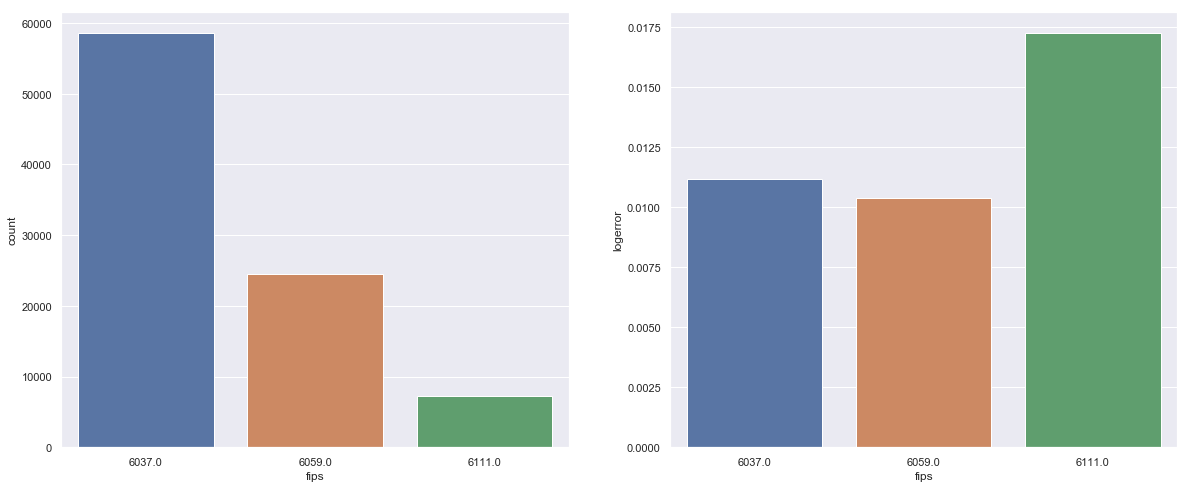

In [48]:
color = sns.color_palette()
grouped_fips=train_df[['fips','calculatedfinishedsquarefeet_reg','logerror','taxvaluedollarcnt','structuretaxvaluedollarcnt']].groupby('fips').mean().reset_index()
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sns.countplot(x='fips', data= train_df, ax=ax1)
sns.barplot(x = 'fips', y = 'logerror',data= grouped_fips, ax=ax2)

In [54]:
#grouped_fip=train_df[['fips','calculatedfinishedsquarefeet_reg','logerror','taxvaluedollarcnt','structuretaxvaluedollarcnt']].groupby('fips',as_index=False)
#grouped_fip.columns()
grouped_fip_6037 = train_df[train_df['fips']==6037.00]
grouped_fip_6059 = train_df[train_df['fips']==6059.00]
grouped_fip_6111 = train_df[train_df['fips']==6111.00]

In [55]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    
    return perm_sample_1, perm_sample_2

In [56]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [53]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean logerror from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(grouped_fip_6059['logerror'],grouped_fip_6037['logerror'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(grouped_fip_6059['logerror'], grouped_fip_6037['logerror'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)   
print(empirical_diff_means)

p-value = 0.7402
-0.0007988532581118257


The large p value means our hypothesis is correct, there is no substantial evidence that fips 6037 and 6059 are different. 

In [58]:
# Compute difference of mean logerror from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(grouped_fip_6111['logerror'],grouped_fip_6059['logerror'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(grouped_fip_6111['logerror'], grouped_fip_6059['logerror'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)   
print(empirical_diff_means)

p-value = 0.0002
0.0068632346344218425


The small p value means our hypothesis is not valid, there is substantial evidence that fips 6059 and 6111 are different.